#Customer Churn Prediction
by Akash Mehta

## Here are the answers to each point in candidate expectations gievn in the task statement. They are all labelled by their corresponding number and are in order with grouped with their code-wise analysis.

# Installation of Autogluon:
According to the task I have to predict which customers are most likely to churn and leave the company's services, hence for this tabular predictive task T've decided to use Autogluon as my preferrable tool.


In [ ]:

# Upgrade pip to ensure the latest package versions are available
!pip install -U pip
# Upgrade setuptools to be compatible with namespace packages
!pip install -U setuptools
!pip install -U "mxnet<2.0.0"
# Install pre-release, frozen to a particual pre-release for stability
!pip install --pre "autogluon==0.0.16b20201214"


     |████████████████████████████████| 1.6MB 13.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 818 kB 12.9 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.0.0
    Uninstalling setuptools-57.0.0:
      Successfully uninstalled setuptools-57.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 46.9 MB 66 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 41 kB 495 kB/s 
     |████████████████████████████████| 309 kB 28.6 MB/s 
     |████████████████████████████████| 242 kB 45.9 MB/s 
     |████████████████████████████████| 131 kB 51.8 MB/s 
     |████████████████████████████████| 206 kB 52.5 MB/s 
     |████████████████████████████████| 101 kB 11.1 MB/s 
     |████████████████████████████████| 964 kB 39.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 38.3 MB/s 
     |████████████████████████████████| 81 kB 9.3 MB/s 
     |████████████████████████████████| 119 kB 55.9 MB/s 
     |████████████████████████████████| 997 kB 44.2 MB/s 
     |██████████████

In [ ]:

import autogluon.core as ag
from autogluon.tabular import TabularPrediction as task
import pandas as pd


# ***1***:
## Loading Data and splitting it exactly into 4000:3093 as calibration data and validation data.

In [ ]:
import numpy as np

df = task.Dataset(file_path='/content/Churn.csv')
df=df.drop("customerID", axis=1) # removing unnecessary columns
train_data=df.sample(frac=0.567939798,random_state=200) #random state is a seed value
test_data=df.drop(train_data.index)
print(train_data.head())
label_column = 'Churn'
print("Summary of occupation column: \n", train_data['Churn'].describe())
y_test = test_data[label_column]
test_data_nolabel = test_data.drop(labels=[label_column], axis=1)  # delete label column

metric = 'accuracy' 


      gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
2632  Female              0      No  ...          64.75       3617.10    No
1027  Female              0      No  ...          94.90       4615.25    No
6123    Male              0      No  ...          93.55       6069.25    No
6071    Male              0     Yes  ...         105.55       7542.25    No
3136  Female              0      No  ...          70.00       1144.50   Yes

[5 rows x 20 columns]
Summary of occupation column: 
 count     4000
unique       2
top         No
freq      2903
Name: Churn, dtype: object


In [ ]:
test_data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
10,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# ***2***:
##Predicting **Churn**
Lets start by taking a look at how preset hyperparamters perform with our dataset by loading standardised values 

In [ ]:
presets = ['good_quality_faster_inference_only_refit', 'optimize_for_deployment']#training from custom presets
predictor_light = task.fit(train_data=train_data, label=label_column, eval_metric=metric,
                           presets=presets, time_limits=80)

No output_directory specified. Models will be saved in: AutogluonModels/ag-20210712_233735/
Beginning AutoGluon training ... Time limit = 80s
AutoGluon will save models to AutogluonModels/ag-20210712_233735/
AutoGluon Version:  0.0.16b20201214
Train Data Rows:    4000
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12654.76 MB
	Train Data (Original)  Memory Usage: 3.91 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_met

# ***2***:
# Best-Fit model from above experiment is the **WeightedEnsemble_FULL_L1 with accuracy on test data: 0.7946105816628327**

In [ ]:
y_pred = predictor_light.predict(test_data_nolabel)
print("Predictions:  ", list(y_pred)[:5])
perf = predictor_light.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.7946105816628327
Evaluations on test data:
{
    "accuracy": 0.7946105816628327,
    "accuracy_score": 0.7946105816628327,
    "balanced_accuracy_score": 0.7059300301389677,
    "matthews_corrcoef": 0.43366078158976407,
    "f1_score": 0.7946105816628327
}
Detailed (per-class) classification report:
{
    "No": {
        "precision": 0.8460891505466779,
        "recall": 0.8859533245266402,
        "f1-score": 0.8655624865562487,
        "support": 2271
    },
    "Yes": {
        "precision": 0.6105263157894737,
        "recall": 0.5259067357512953,
        "f1-score": 0.5650661099512874,
        "support": 772
    },
    "accuracy": 0.7946105816628327,
    "macro avg": {
        "precision": 0.7283077331680758,
        "recall": 0.7059300301389677,
        "f1-score": 0.715314298253768,
        "support": 3043
    },
    "weighted avg": {
        "precision": 0.7863275638123495,
        "recall": 0.7946105816628327,
        "f1-score": 0.789327454

Predictions:   ['No', 'No', 'Yes', 'No', 'No']


# ***2***:
## Hypertuning custom parameters:
Let's start building the real model. I choose specific activation layers and a model layout in the hyperparameters options and stack up my dataset against every type of classification model to get the best possible result.

No output_directory specified. Models will be saved in: AutogluonModels/ag-20210712_235039/
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to AutogluonModels/ag-20210712_235039/
AutoGluon Version:  0.0.16b20201214
Train Data Rows:    4000
Train Data Columns: 19
Tuning Data Rows:    3043
Tuning Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12596.72 MB
	Train Data (Original)  Memory Usage: 6.89 MB (0.1% of available memory)
	Inferring data type of e

Time out (secs) is 81.0


	0.8114	 = Validation accuracy score
	1.19s	 = Training runtime
	0.05s	 = Validation runtime
	0.8055	 = Validation accuracy score
	1.54s	 = Training runtime
	0.09s	 = Validation runtime
	0.8041	 = Validation accuracy score
	1.32s	 = Training runtime
	0.1s	 = Validation runtime
	0.8084	 = Validation accuracy score
	1.42s	 = Training runtime
	0.06s	 = Validation runtime
	0.8124	 = Validation accuracy score
	1.46s	 = Training runtime
	0.06s	 = Validation runtime
scheduler_options: Key 'training_history_callback_delta_secs': Imputing default value 60
scheduler_options: Key 'delay_get_config': Imputing default value True

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 5


Time out (secs) is 81.0


Please either provide filename or allow plot in get_training_curves
	0.8143	 = Validation accuracy score
	7.96s	 = Training runtime
	0.26s	 = Validation runtime
	0.816	 = Validation accuracy score
	10.2s	 = Training runtime
	0.28s	 = Validation runtime
	0.7456	 = Validation accuracy score
	9.54s	 = Training runtime
	0.25s	 = Validation runtime
	0.814	 = Validation accuracy score
	8.31s	 = Training runtime
	0.3s	 = Validation runtime
	0.8186	 = Validation accuracy score
	11.95s	 = Training runtime
	0.34s	 = Validation runtime
Fitting model: WeightedEnsemble_L1 ... Training model for up to 179.72s of the 107.35s of remaining time.
	0.8216	 = Validation accuracy score
	1.65s	 = Training runtime
	0.01s	 = Validation runtime
AutoGluon training complete, total runtime = 74.38s ...


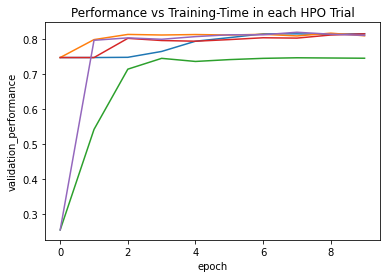

In [ ]:
hp_tune = True  # whether or not to do hyperparameter optimization

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100],[1000],[200,100],[300,200,100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limits = 3*60  # train various models for ~2 min
num_trials = 5  # try at most 3 different hyperparameter configurations for each type of model
search_strategy = 'skopt'  # to tune hyperparameters using SKopt Bayesian optimization routine

predictor = task.fit(train_data=train_data, tuning_data=test_data, label=label_column,
                     time_limits=time_limits, eval_metric=metric, num_trials=num_trials,
                     hyperparameter_tune=hp_tune, hyperparameters=hyperparameters,
                     search_strategy=search_strategy)

# ***2***:
## Let's now analyze how well my hyperparameter tuned models performed and statistically choose the best one.

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L1   0.821558       1.235899  40.269501                0.007216           1.651349            1       True         11
1   NeuralNetMXNet/trial_9   0.818600       0.336245  11.949471                0.336245          11.949471            0       True         10
2   NeuralNetMXNet/trial_6   0.815971       0.280786  10.202878                0.280786          10.202878            0       True          7
3   NeuralNetMXNet/trial_5   0.814328       0.257831   7.959177                0.257831           7.959177            0       True          6
4   NeuralNetMXNet/trial_8   0.813999       0.303191   8.310290                0.303191           8.310290            0       True          9
5         LightGBM/trial_4   0.812356       0.060988   1.458995                0.06098

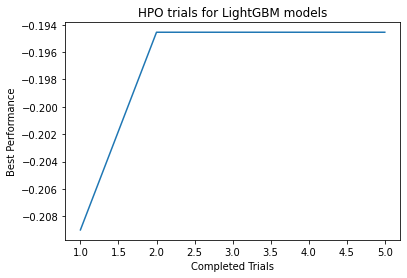

Plot summary of models saved to file: AutogluonModels/ag-20210712_235039/NeuralNetMXNet_HPOmodelsummary.html
Plot summary of models saved to file: NeuralNetMXNet_HPOmodelsummary.html
Plot of HPO performance saved to file: AutogluonModels/ag-20210712_235039/NeuralNetMXNet_HPOperformanceVStrials.png


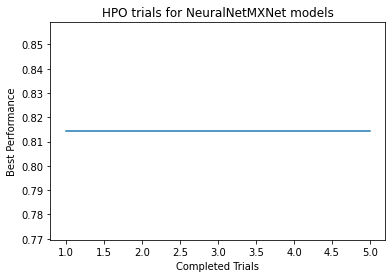

*** Details of Hyperparameter optimization ***
HPO for LightGBM model:  Num. configurations tried = 5, Time spent = 12.549485921859741s, Search strategy = skopt
Best hyperparameter-configuration (validation-performance: accuracy = -0.19454485704896485):
{'feature_fraction': 0.9182206813628291, 'learning_rate': 0.010793476993478433, 'min_data_in_leaf': 3, 'num_leaves': 64}
HPO for NeuralNetMXNet model:  Num. configurations tried = 5, Time spent = 57.37860631942749s, Search strategy = skopt
Best hyperparameter-configuration (validation-performance: accuracy = 0.8143279658232008):
{'activation▁choice': 0, 'dropout_prob': 0.1, 'embedding_size_factor': 1.0, 'layers▁choice': 0, 'learning_rate': 0.0005, 'network_type▁choice': 0, 'use_batchnorm▁choice': 0, 'weight_decay': 1e-06}
*** End of fit() summary ***


In [ ]:
results = predictor.fit_summary()

# ***2***:
The neural net models outperformed the gradient boosted trees with an evaluation of accuracy on test data: 0.8216(82%), being one of my performances for predicting Churn potential. 

In [ ]:
predictor.leaderboard(test_data,extra_info=True, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,num_features,num_models,num_models_w_ancestors,memory_size,memory_size_w_ancestors,memory_size_min,memory_size_min_w_ancestors,num_ancestors,num_descendants,model_type,child_model_type,hyperparameters,hyperparameters_fit,AG_args_fit,features,child_hyperparameters,child_hyperparameters_fit,child_AG_args_fit,ancestors,descendants
0,WeightedEnsemble_L1,0.821558,0.821558,1.466205,1.235899,40.269501,0.009213,0.007216,1.651349,1,True,11,8,1,9,3400,16277502,3400,6094858,8,0,WeightedEnsembleModel,GreedyWeightedEnsembleModel,"{'use_orig_features': False, 'max_base_models'...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[NeuralNetMXNet/trial_9, LightGBM/trial_1, Lig...",{'ensemble_size': 100},{'ensemble_size': 40},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[NeuralNetMXNet/trial_9, LightGBM/trial_1, Lig...",[]
1,NeuralNetMXNet/trial_9,0.818600,0.818600,0.449273,0.336245,11.949471,0.449273,0.336245,11.949471,0,True,10,19,1,1,6094858,6094858,6094858,6094858,0,1,TabularNeuralNetModel,None,"{'num_epochs': 10, 'epochs_wo_improve': 20, 's...",{'num_epochs': 8},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[SeniorCitizen, tenure, MonthlyCharges, TotalC...",None,None,None,[],[WeightedEnsemble_L1]
2,NeuralNetMXNet/trial_6,0.815971,0.815971,0.399660,0.280786,10.202878,0.399660,0.280786,10.202878,0,True,7,19,1,1,6014122,6014122,6014122,6014122,0,1,TabularNeuralNetModel,None,"{'num_epochs': 10, 'epochs_wo_improve': 20, 's...",{'num_epochs': 9},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[SeniorCitizen, tenure, MonthlyCharges, TotalC...",None,None,None,[],[WeightedEnsemble_L1]
3,NeuralNetMXNet/trial_5,0.814328,0.814328,0.341772,0.257831,7.959177,0.341772,0.257831,7.959177,0,True,6,19,1,1,630672,630672,630672,630672,0,0,TabularNeuralNetModel,None,"{'num_epochs': 10, 'epochs_wo_improve': 20, 's...",{'num_epochs': 10},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[SeniorCitizen, tenure, MonthlyCharges, TotalC...",None,None,None,[],[]
4,NeuralNetMXNet/trial_8,0.813999,0.813999,0.359394,0.303191,8.310290,0.359394,0.303191,8.310290,0,True,9,19,1,1,2423458,2423458,2423458,2423458,0,0,TabularNeuralNetModel,None,"{'num_epochs': 10, 'epochs_wo_improve': 20, 's...",{'num_epochs': 10},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[SeniorCitizen, tenure, MonthlyCharges, TotalC...",None,None,None,[],[]
5,LightGBM/trial_4,0.812356,0.812356,0.037115,0.060988,1.458995,0.037115,0.060988,1.458995,0,True,5,19,1,1,174253,174253,174253,174253,0,1,LGBModel,None,"{'num_boost_round': 100, 'num_threads': 2, 'ob...",{'num_boost_round': 37},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[SeniorCitizen, tenure, MonthlyCharges, TotalC...",None,None,None,[],[WeightedEnsemble_L1]
6,LightGBM/trial_0,0.811370,0.811370,0.035304,0.052741,1.185385,0.035304,0.052741,1.185385,0,True,1,19,1,1,76846,76846,76846,76846,0,1,LGBModel,None,"{'num_boost_round': 100, 'num_threads': 2, 'ob...",{'num_boost_round': 19},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[SeniorCitizen, tenure, MonthlyCharges, TotalC...",None,None,None,[],[WeightedEnsemble_L1]
7,LightGBM/trial_3,0.808413,0.808413,0.038141,0.057019,1.423966,0.038141,0.057019,1.423966,0,True,4,19,1,1,272305,272305,272305,272305,0,1,LGBModel,None,"{'num_boost_round': 100, 'num_threads': 2, 'ob...",{'num_boost_round': 47},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[SeniorCitizen, tenure, MonthlyCharges, TotalC...",None,None,None,[],[WeightedEnsemble_L1]
8,LightGBM/trial_1,0.805455,0.805455,0.050236,0.093376,1.538734,0.050236,0.093376,1.538734,0,True,2,19,1,1,663797,663797,663797,663797,0,1,LGBModel,None,"{'num_boost_round': 100, 'num_threads': 2, 'ob...",{'num_boost_round': 100},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[SeniorCitizen, tenure, MonthlyCharges, TotalC...",None,None,None,[],[WeightedEns

# ***2***:
We get to know the WeightedEnsemble_L1 model is my best, hence we shall select this as my default for predictions. Weighted ensemble meta-model that implements Ensemble Selection

In [ ]:
y_pred = predictor.predict(test_data_nolabel)
print("Predictions:  ", list(y_pred)[:5])
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.821557673348669
Evaluations on test data:
{
    "accuracy": 0.821557673348669,
    "accuracy_score": 0.821557673348669,
    "balanced_accuracy_score": 0.7427937978978012,
    "matthews_corrcoef": 0.5096431591397848,
    "f1_score": 0.821557673348669
}
Detailed (per-class) classification report:
{
    "No": {
        "precision": 0.8642495784148398,
        "recall": 0.9026860413914575,
        "f1-score": 0.8830497523153135,
        "support": 2271
    },
    "Yes": {
        "precision": 0.6706408345752608,
        "recall": 0.582901554404145,
        "f1-score": 0.6237006237006236,
        "support": 772
    },
    "accuracy": 0.821557673348669,
    "macro avg": {
        "precision": 0.7674452064950503,
        "recall": 0.7427937978978012,
        "f1-score": 0.7533751880079685,
        "support": 3043
    },
    "weighted avg": {
        "precision": 0.8151316190838654,
        "recall": 0.821557673348669,
        "f1-score": 0.8172536539615374

Predictions:   ['No', 'No', 'Yes', 'No', 'No']


# ***3***:
Feature engineering is a must when it comes to high accuracy models, hence I decide to get rid of the employee ID column as it wouldnt be significant due to it's isolated uniqueness. I thereby choose the method of evaluation as 'accuracy' for it to detect that the mode of learning I'm using is logistic regression for the classification of these employees.

# ***4***:
## Here we get to know the value 'Yes' has been predicted with a precision of 67% whereas 'No' is 86%.

In [ ]:
test_data['Prediction']=y_pred


# ***4***:
## Here we can see the Churn values and my Predictions side by side, in their corresponding columns towards the right for the first 20 rows in the validation set, stacking up quite precisely.

In [ ]:
test_data.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Prediction
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Yes
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,No
10,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,No
12,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No,No
17,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No,No
18,Female,0,Yes,Yes,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,No
23,Female,0,Yes,No,58,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),59.90,3505.10,No,No
27,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,No


# ***5***:
## Feature Importance
The features which have a pvalue greater than 0.5 have a very significant impact on churn rates. Below here, we can see tenure, contract and internet service are the most important features where as partners, dependants and phone service have a lesser impact.

In [ ]:
importance_scores = predictor.feature_importance(test_data)
print(importance_scores)

Computing feature importance via permutation shuffling for 20 features using 1000 rows with 3 shuffle sets...
	69.69s	= Expected runtime (23.23s per shuffle set)
	20.81s	= Actual runtime (Completed 3 of 3 shuffle sets)


                  importance    stddev   p_value  n  p99_high   p99_low
tenure              0.031000  0.005568  0.005291  3  0.062904 -0.000904
Contract            0.024333  0.001155  0.000375  3  0.030950  0.017717
InternetService     0.020000  0.007211  0.020353  3  0.061320 -0.021320
PaperlessBilling    0.014333  0.007234  0.037715  3  0.055786 -0.027119
MonthlyCharges      0.013333  0.011930  0.096268  3  0.081696 -0.055029
TotalCharges        0.011667  0.003512  0.014451  3  0.031790 -0.008457
TechSupport         0.009333  0.002309  0.009902  3  0.022566 -0.003900
OnlineSecurity      0.009000  0.002646  0.013809  3  0.024160 -0.006160
MultipleLines       0.007000  0.004000  0.046892  3  0.029920 -0.015920
PaymentMethod       0.006333  0.006028  0.105193  3  0.040873 -0.028206
SeniorCitizen       0.004000  0.001732  0.028595  3  0.013925 -0.005925
StreamingMovies     0.003333  0.004041  0.144665  3  0.026491 -0.019825
DeviceProtection    0.003000  0.001732  0.047733  3  0.012925 -0

# ***6***:
Yes these features make sense as the longer a customer buys your service, the expectations and standards gradually increase and should be entertained in time, before the customer decides to grow unsatisfied with his current contract and internet service. The quality of connection matters greatly as well.

#***7***
Here are some ways to encourage your customers to keep coming back to you:
Improving your customer service,
Offering loyalty discounts and freebies,
Offering membership perks,
Advertising future deals,
and Embracing social media for better reach.

# ***8***:
Assuming the above suggestions had been implemented, we would add them as new features to this dataset, perform the same analysis using the same highly efficient models and compare these new features to the old to see how much of a difference they actually made.

# Conclusion:
I was able to acheive highly precise results on par with the preset parameters, predicting Churn potential with an accuracy of 82% I would appreciate if the jury had any pointers or constructive criticism to offer. Thank you for your time.
